<a href="https://colab.research.google.com/github/SaiManjithMatta/Assignment_4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Apply Linear Regression to the provided dataset using underlying steps.**

a. Import the given “Salary_Data.csv”

b. Split the data in train_test partitions, such that 1/3 of the data is 
reserved as test subset.

c. Train and predict the model.

d. Calculate the mean_squared error

e. Visualize both train and test data using scatter plot.


In [1]:
# importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

#visualization
import seaborn as sns
sns.set(style="white", color_codes=True)

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:

#Mounting to the drive for reading the data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
#1.1. Import the given “Salary_Data.csv”
df = pd.read_csv('gdrive/My Drive/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
#1.2. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.33333333,random_state = 0)

In [49]:
#1.3.Train and predict the model. 
# Fitting Simple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result 
Y_Pred = regressor.predict(X_Test)

In [50]:
#1.4. Calculate the mean_squared error
mean_squared_error(Y_Test,Y_Pred)

21026037.329511296

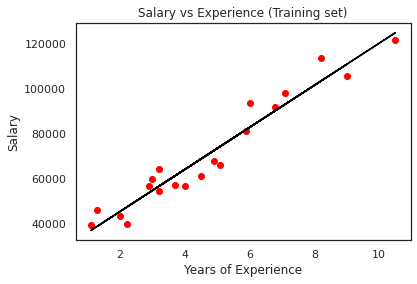

In [55]:
#1.5. Visualize both train and test data using scatter plot.
# Visualising the Training set results
plt.scatter(X_Train, Y_Train, color = "red")
plt.plot(X_Train, regressor.predict(X_Train), color = "black")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

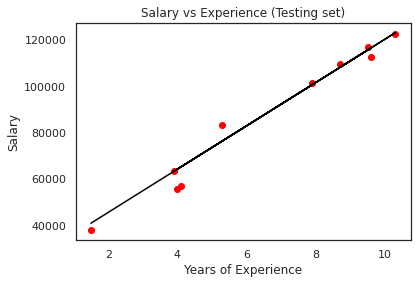

In [56]:
# Visualising the Test set results
plt.scatter(X_Test, Y_Test, color = "red")
plt.plot(X_Test, regressor.predict(X_Test), color = "black")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

**2. Apply K means clustering in the dataset provided:**

• Remove any null values by the mean.

• Use the elbow method to find a good number of clusters with the K-Means algorithm

• Calculate the silhouette score for the above clustering

In [15]:
df_2=pd.read_csv("gdrive/My Drive/K-Mean_Dataset.csv")
df_2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [30]:
#Checking for none
df_2.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [31]:
#replacing with the mean
df_2.drop(['CUST_ID'],inplace=True,axis=1)
df_2['MINIMUM_PAYMENTS'].fillna(value=df_2['MINIMUM_PAYMENTS'].mean(),inplace=True)
df_2['CREDIT_LIMIT'].fillna(value=df_2['CREDIT_LIMIT'].mean(),inplace=True)

In [32]:
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(df_2)
print(km)
# predicting the cluster for each data point
y_cluster_kmeans = km.predict(df_2)
score = metrics.silhouette_score(df_2, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.4671491104702138


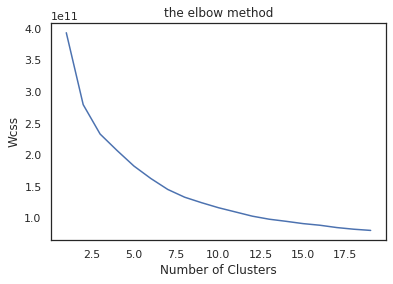

In [34]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(df_2)

y_cluster_kmeans = kmeans.predict(df_2)
silhouette_score = metrics.silhouette_score(df_2, y_cluster_kmeans)
print(silhouette_score)

0.3810874517610816


**3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
Yes, can you justify why**


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(df_2)

In [58]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit( creditcard_df_scaled)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(creditcard_df_scaled)
from sklearn import metrics
score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.25055570796307736


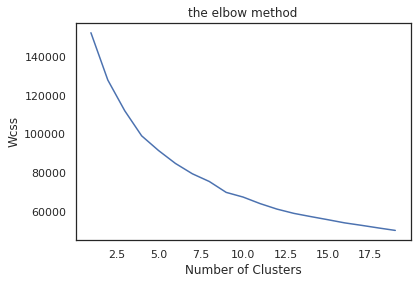

In [38]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(creditcard_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_df_scaled)
#print(labels)
y_cluster_kmeans = kmeans.predict(creditcard_df_scaled)
scaled_silhouette_score = metrics.silhouette_score(creditcard_df_scaled, y_cluster_kmeans)

In [43]:
print(scaled_silhouette_score)

0.20854008021562268
